
# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

.

## Step 1: Exploration of Data Sets

Visualize the German traffic signs daata Sets ; display random images, plot graph(s) of unique symbols. plot number of occurences of unique symbols


In [1]:
#importing some useful packages
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import cv2
import time as time
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
import numpy as np
%matplotlib inline
import tensorflow as tf
from PIL import Image
import time
from datetime import timedelta
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import tensorflow as tf
import time
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.tree
import sklearn.ensemble

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def OneHotEncoding(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Load pickled data
import pickle


def download(url,file):
    """
    train: http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Training_Images.zip
    test:  http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Test_Images.zip
    Download file from <URL>
    :param url: URL to file
    :param file: Local file path
    """
    if not os.path.isfile(file):
        print('Downloading ' + file + '.....')
        urllib.request.urlretrieve(url,file)
        print('Download Finished')
        
def get_name_from_label(label):
    # Helper, transofrm a numeric label into the corresponding strring
    return signnames.loc[label].SignName
                            
        
# TODO: Fill this in based on where you saved the training and testing data
# download train & test datasets from GTSRB 

#download('http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Training_Images.zip','trafficsign_train.zip')
#download('http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Test_Images.zip','trafficsign_test.zip')


#import zipfile
#with zipfile.ZipFile("./trafficsign_train.zip","r") as zip_ref:
#    print('Extracting all the files now...') 
#    zip_ref.extractall(".")
#    print('Done that.')



training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    

    
X_valid, y_valid = valid['features'], valid['labels']

signnames = pd.read_csv('./signnames.csv')
signnames.set_index('ClassId',inplace=True)

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
labels_train = OneHotEncoding(y_train,43)
labels_test = OneHotEncoding(y_test,43)

In [4]:
def check_OHE(cls,y):
    check = np.linalg.norm(np.argmax(cls,axis=1)-y)
    if check == 0:
        print('One hot encoding correct, ok to proceed')
    else:
        print('One hot encoding doesnt match the output, check code!!!')

In [5]:

check_OHE(labels_test,y_test)
check_OHE(labels_train,y_train)

One hot encoding correct, ok to proceed
One hot encoding correct, ok to proceed


In [6]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
image_shape = np.shape(X_train[1])
# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the dataset

Here I am printing number of training examples for each class; From signnames.csv file, I extract the text name of the traffic 
type class and using that to show most common traffic signs (large set of training examples) and more rare signs 
(lowest number of training examples; will this affect my accuracy if testing examples have more occurance of rare signs 
 especially in each mini-batch run. how to make sure good distribution of most and rate signs in each mini-batch (batch normalization???)

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


counter = Counter(y_train)
print("Train example per class mean {} min {} max {}".format(int(np.mean(list(Counter(y_train).values()))),
                                                    np.min(list(Counter(y_train).values())) ,
                                                    np.max(list(Counter(y_train).values())) ))
print()
print("Most common signs:")
for el in counter.most_common(len(signnames)):
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))
print()
print("Most rare signs:")
for el in sorted(counter.items(),key=lambda x: x[1])[:len(signnames)]:
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))

Train example per class mean 809 min 180 max 2010

Most common signs:
'Speed limit (50km/h)'  train samples: 2010
'Speed limit (30km/h)'  train samples: 1980
'Yield'  train samples: 1920
'Priority road'  train samples: 1890
'Keep right'  train samples: 1860
'No passing for vehicles over 3.5 metric tons'  train samples: 1800
'Speed limit (70km/h)'  train samples: 1770
'Speed limit (80km/h)'  train samples: 1650
'Road work'  train samples: 1350
'No passing'  train samples: 1320
'Speed limit (100km/h)'  train samples: 1290
'Speed limit (60km/h)'  train samples: 1260
'Speed limit (120km/h)'  train samples: 1260
'Right-of-way at the next intersection'  train samples: 1170
'Ahead only'  train samples: 1080
'General caution'  train samples: 1080
'No entry'  train samples: 990
'Wild animals crossing'  train samples: 690
'Stop'  train samples: 690
'Turn right ahead'  train samples: 599
'Traffic signals'  train samples: 540
'No vehicles'  train samples: 540
'Children crossing'  train samples: 48

In [8]:

##utilities for plotting images

def plot_random_3C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot])
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()
def plot_random_1C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot],cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()   
def plot_random_preprocess(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(pre_process_image(X[ind_plot]),cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()

    
def pre_process_image(image):

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    
    return image

## Pick random images from datasets and plot them using matplot

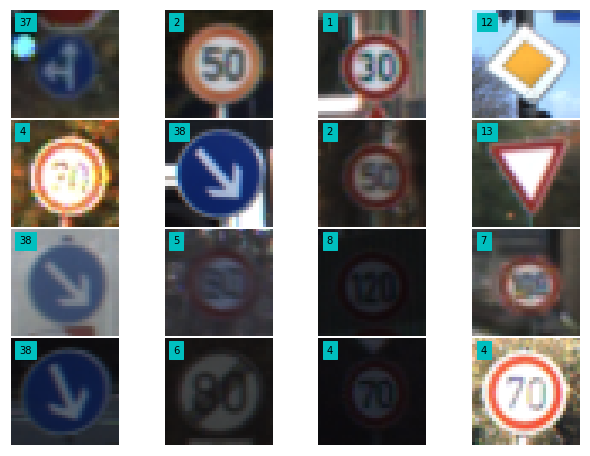

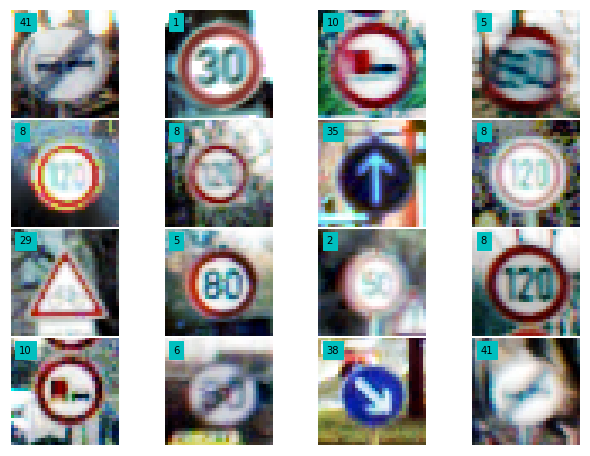

In [9]:
image = X_train[0]

plot_random_3C(4,4,X_train,y_train)

img_resize = 32
N_classes = 43
image_shape = (img_resize,img_resize)
img_size_flat = img_resize*img_resize


image_GS_train = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
image_GS_test = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)



plot_random_3C(4,4,image_GS_train+.5,y_train)


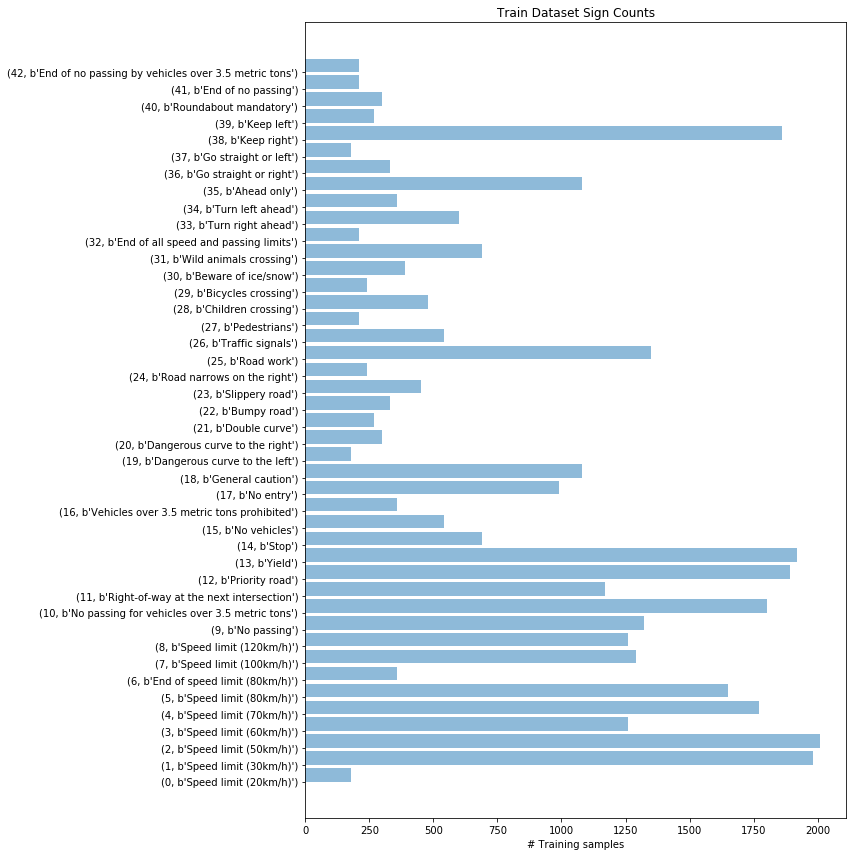

In [10]:
data_i = [[i,sum(y_train == i)] for i in range(len(np.unique(y_train)))]
data_i_sorted = sorted(data_i, key=lambda x: x[1])

data_pd = pd.read_csv('signnames.csv')

data_pd['Occurance'] = pd.Series(np.asarray(data_i_sorted).T[1], index=np.asarray(data_i_sorted).T[0])
data_pd_sorted = data_pd.sort_values(['Occurance'],ascending=[0]).reset_index()
data_pd_sorted = data_pd_sorted.drop('index', 1)
data_pd_sorted.head(10)


#plt.figure(figsize=(12,8))
#plt.bar(range(43),height=data_pd_sorted["Occurance"])



### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np

if not os.path.isdir('./plots'):
    os.mkdir('./plots',755)
    
signnames_values = np.genfromtxt('./signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
y_labelnames = np.arange(len(signnames_values))    
unique_train, counts_train = np.unique(y_train, return_counts=True)    
plt.figure(figsize=(12,12))
plt.barh(y_labelnames, counts_train, align='edge', alpha=0.5)
plt.yticks(y_labelnames, signnames_values)
plt.xlabel('# Training samples')
plt.title('Train Dataset Sign Counts')
plt.tight_layout()
plt.show()
plt.savefig('./plots/training_set_counts.png')



#print("Most common signs:")
#for el in counter.most_common(10):
#    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))
#print()
#print("Most rare signs:")
#for el in sorted(counter.items(),key=lambda x: x[1])[:10]:
#    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Brightness Normalization

I am using Brightness normalization to remove the variations in brightness of images. For removing brightness,
I am using cv2.equalizeHist() on each channel of the image. This would take away any bias that the model may learn for wrongly classfiying based on lighting

In [11]:
img_size = 32
import cv2

def brightness_normalization(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    #image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    #image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    return image[:,:,0]

def sharpen_img(image):
    img = cv2.GaussianBlur(image, (5,5), 20.0)
    img = cv2.addWeighted(image, 2, img, -1, 0)
    return img


### Normalize data sets
Here I am normalizing image data between 0 to 1; keep the mean of the image close to 0 by dividing image by 255.

In [12]:
def normalize_image(image):
    image = image/255
    #image = ((image/image.max()) - 0.5)*2
    return image

def preprocess_image(image):
    img = cv2.cvtColor(image,cv2.COLOR_RGB2YUV)
    img = sharpen_img(img)
    img = brightness_normalization(img)
    img = normalize_image(img)
    return img

#for i in range(number_to_stop):
#    index = random.randint(0, n_train-1)
#    labels[i] = sign_values[y_train[index]][1].decode('ascii')
#    img = preprocess_image(X_train[index])
#    figures[i] = img
    #img_copy = img.copy()
    #img.shape = (1,) + img.shape + (1,)
    print(img.shape)
    
#plot_images(figures,5,2,labels)

### Data Augmentation
Generate more data by transforming (rotate, scale, appply random brightness, translation) to simulate the effect of viewing images from varying distance, differnet angles or simply varying brightness. This help us to generate more training samples. Original Source code can be found here...

https://github.com/vxy10/ImageAugmentation

In [13]:
img_resize = 32

def augment_brightness(image):
    img = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    img[:,:,2] = img[:,:,2]*random_bright
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img


def transform_image(image,ang_range,shear_range,trans_range):

    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    image = pre_process_image(image)
    
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    
    return image

def get_index_dict(y_train):
    # Returns indices of each label
    # Assumes that the labels are 0 to N-1
    dict_indices = {}
    ind_all = np.arange(len(y_train))

    for i in range(len(np.unique(y_train))):
        ind_i = ind_all[y_train == i]
        dict_indices[i] = ind_i
        #print(ind_i)
    return dict_indices

def gen_transformed_data(X_train,y_train,n_each,ang_range,shear_range,trans_range):
   
    dict_indices = get_index_dict(y_train)
    n_class = len(np.unique(y_train))
    X_arr = []
    Y_arr = []
    for i in range(n_class):
        len_i = len(dict_indices[i])
        ind_rand = np.random.randint(0,len_i,n_each)
        ind_dict_class  = dict_indices[i]
       
        for i_n in range(n_each):
            img_trf = transform_image(X_train[ind_dict_class[ind_rand[i_n]]],
                                     ang_range,shear_range,trans_range)
            X_arr.append(img_trf)
            Y_arr.append(i)
           
    X_arr = np.array(X_arr,dtype = np.float32())
    Y_arr = np.array(Y_arr,dtype = np.float32())
   
    if (True == 1):
        len_arr = np.arange(len(Y_arr))
        np.random.shuffle(len_arr)
        X_arr[len_arr] = X_arr
        Y_arr[len_arr] = Y_arr

    return X_arr,Y_arr


def gen_extra_data(X_train,y_train,n_each,ang_range,shear_range,trans_range):
    
    dict_indices = get_index_dict(y_train)
    n_class = len(np.unique(y_train)) 
    X_arr = []
    Y_arr = []
    n_train = len(X_train)
    for i in range(n_train):
        #X_arr.append(transform_image(X_train[i],0,0,0)/255.)
        #Y_arr.append(y_train[i])
        for i_n in range(n_each):
            img_trf = transform_image(X_train[i],
                                      ang_range,shear_range,trans_range)
            X_arr.append(img_trf)
            Y_arr.append(y_train[i])
            
    X_arr = np.array(X_arr,dtype = np.float32())
    Y_arr = np.array(Y_arr,dtype = np.float32())
    
    if (True):
        len_arr = np.arange(len(Y_arr))
        np.random.shuffle(len_arr)
        X_arr[len_arr] = X_arr
        Y_arr[len_arr] = Y_arr

    return X_arr,Y_arr

### Visualize AUGMENT data

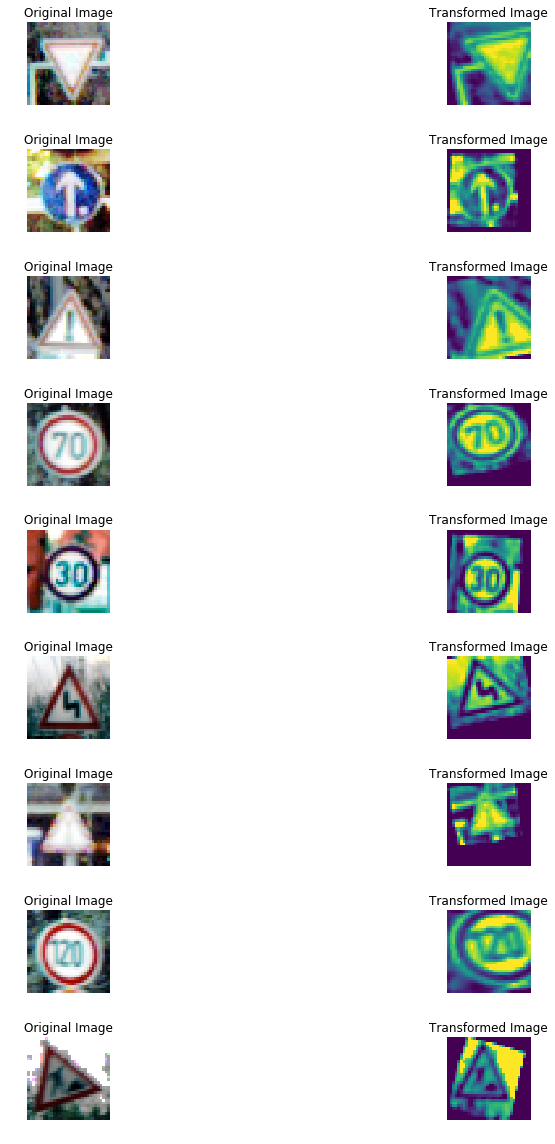

In [16]:

import random

plt.figure(figsize=(16,16))
number_to_stop = 9
orig_image = {}
aug_image = {}
for i in range(number_to_stop):
    index = random.randint(0, n_train-1)
    orig_image[i] = X_train[index]
    aug_image[i] = transform_image(X_train[index],20,10,5)
    
index = 1    

for ii in  range(len(orig_image)):
    plt.subplot(9,2,index)
    plt.imshow(orig_image[ii])
    plt.title('Original Image')
    plt.axis('off')
    index = index + 1
    plt.subplot(9,2,index)
    plt.axis('off')
    plt.imshow(aug_image[ii])
    plt.title('Transformed Image')
    index = index + 1
plt.tight_layout()

In [14]:
Image_train_GS_aug,y_train_aug = gen_transformed_data(X_train,y_train,
                                                                       10,30,5,5)

In [15]:
def next_min_batch():
    # Number of images in the training-set.
    num_images = len(Image_train_GS_aug_next)
    # Create a random index.
    idx = np.random.choice(num_images,
                           size=batch_size,
                           replace=False)
    # Use the random index to select random images and labels.
    features_batch = Image_train_GS_aug_next[idx, :,:,:]
    labels_batch = labels_train_aug[idx, :]

    return features_batch, labels_batch

In [16]:
def get_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
def get_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

def conv_layer(input,
               num_inp_channels,
               filter_size,
               num_filters,
              use_pooling):
    shape = [filter_size, filter_size, num_inp_channels,num_filters]
    weights = get_weights(shape)
    biases = get_biases(num_filters)
    layer = tf.nn.conv2d(input = input,
                        filter = weights,
                        strides = [1,1,1,1],
                        padding = 'SAME')

    layer += biases
    
    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                         ksize=[1, 2, 2, 1],
                         strides=[1, 2, 2, 1],
                         padding='SAME')
    layer = tf.nn.relu(layer)
    
    return layer, weights

In [17]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features])
    return layer_flat, num_features

In [18]:
def fc_layer(input,          # The previous layer.
             num_inputs,     # Num. inputs from prev. layer.
             num_outputs,    # Num. outputs.
             use_relu=True): # Use Rectified Linear Unit (ReLU)?
    weights = get_weights(shape=[num_inputs, num_outputs])
    biases = get_biases(length=num_outputs)
    layer = tf.matmul(input, weights) + biases

    if use_relu:
        layer = tf.nn.relu(layer)

    return layer,weights

def dropout_layer(layer, keep_prob):
    layer_drop = tf.nn.dropout(layer, keep_prob)
    return layer_drop

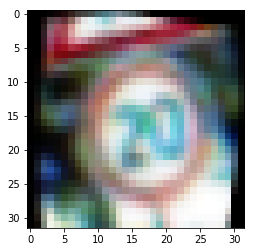

In [19]:
img_size = 32
num_channels = 3 
Image_train_GS_aug_next = Image_train_GS_aug
image_GS_test_1 = image_GS_test
plt.imshow(Image_train_GS_aug_next[5]+.5);


In [20]:
features = tf.placeholder(tf.float32, shape=[None, img_size, img_size,num_channels], 
                   name='features')
labels_true = tf.placeholder(tf.float32,shape=[None,N_classes], name='y_true')

labels_true_cls = tf.argmax(labels_true, dimension=1)

Instructions for updating:
Use the `axis` argument instead


### Model Architecture

I am using Modified LeNet 5 layer DNN with dropout layer (keep_prob=0.5);  first 2 layers are convolution layers with RELU activation. The modified version is each convolution layer (1,2) are repeated with same Tensor configuration stacked on one another. feeding o The final 3 layers are FC layer(s) with RELU as activation layer.



A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.




Training
- Model HyperParameters : Learning rate =1e-3, keep_prob= 0.5 (dropout layer), L2 regularization weight (10^(-5)) BATCH_SIZE=512 
- Training / Validation data : Validation data is generated from train_test_split() with 25% of train data is used as validation data
- I am training model for 20 epochs and in each epoch running model for 5000-10000 iterations; I break off training if I dont see improvement in accuracy
- for each epochs, I have augmented 5-10 images per train_image. 
- after 5 epocs, I have reduced augmentation factors by 0.9

In [21]:
## Convlayer 0
filter_size0 = 1
num_filters0 = 3

## Convlayer 1
filter_size1 = 5
num_filters1 = 32
## Convlayer 2
filter_size2 = 5
num_filters2 = 32

## Convlayer 3
filter_size3 = 5
num_filters3 = 64
## Convlayer 4
filter_size4 = 5
num_filters4 = 64

## Convlayer 5
filter_size5 = 5
num_filters5 = 128
## Convlayer 6
filter_size6 = 5
num_filters6 = 128

## FC_size 
fc_size1 = 1024
## FC_size 
fc_size2 = 1024

## Dropout
#drop_prob = 0.5

keep_prob = tf.placeholder(tf.float32)

In [22]:
layer_conv0, weights_conv0 = \
        conv_layer(input=features,
                   num_inp_channels=num_channels,
                   filter_size=filter_size0,
                   num_filters=num_filters0,
                   use_pooling=False)
layer_conv1, weights_conv1 = \
        conv_layer(input=layer_conv0,
                   num_inp_channels=num_filters0,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=False)
layer_conv2, weights_conv2 = \
        conv_layer(input=layer_conv1,
                   num_inp_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

layer_conv2_drop = dropout_layer(layer_conv2, keep_prob)
    
layer_conv3, weights_conv3 = \
        conv_layer(input=layer_conv2_drop,
                   num_inp_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=False)

layer_conv4, weights_conv4= \
        conv_layer(input=layer_conv3,
                   num_inp_channels=num_filters3,
                   filter_size=filter_size4,
                   num_filters=num_filters4,
                   use_pooling=True)
layer_conv4_drop = dropout_layer(layer_conv4, keep_prob)


layer_conv5, weights_conv5 = \
        conv_layer(input=layer_conv4_drop,
                   num_inp_channels=num_filters4,
                   filter_size=filter_size5,
                   num_filters=num_filters5,
                   use_pooling=False)

layer_conv6, weights_conv6 = \
        conv_layer(input=layer_conv5,
                   num_inp_channels=num_filters5,
                   filter_size=filter_size6,
                   num_filters=num_filters6,
                   use_pooling=True)    

layer_conv6_drop = dropout_layer(layer_conv6, keep_prob)


layer_flat2, num_fc_layers2 = flatten_layer(layer_conv2_drop)
layer_flat4, num_fc_layers4 = flatten_layer(layer_conv4_drop)
layer_flat6, num_fc_layers6 = flatten_layer(layer_conv6_drop)

layer_flat = tf.concat([layer_flat2, layer_flat4, layer_flat6],1)
num_fc_layers = num_fc_layers2+num_fc_layers4+num_fc_layers6

fc_layer1,weights_fc1 = fc_layer(layer_flat,          # The previous layer.
             num_fc_layers,     # Num. inputs from prev. layer.
             fc_size1,    # Num. outputs.
             use_relu=True)
fc_layer1_drop = dropout_layer(fc_layer1, keep_prob)

fc_layer2,weights_fc2 = fc_layer(fc_layer1_drop,          # The previous layer.
             fc_size1,     # Num. inputs from prev. layer.
             fc_size2,    # Num. outputs.
             use_relu=True)
fc_layer2_drop = dropout_layer(fc_layer2, keep_prob)

fc_layer3,weights_fc3 = fc_layer(fc_layer2_drop,          # The previous layer.
             fc_size2,     # Num. inputs from prev. layer.
             n_classes,    # Num. outputs.
             use_relu=False)

labels_pred = tf.nn.softmax(fc_layer3)
labels_pred_cls = tf.argmax(labels_pred, dimension=1)

regularizers = (tf.nn.l2_loss(weights_conv0) 
                + tf.nn.l2_loss(weights_conv1) + tf.nn.l2_loss(weights_conv2) 
                + tf.nn.l2_loss(weights_conv3) + tf.nn.l2_loss(weights_conv4) 
                + tf.nn.l2_loss(weights_conv5) + tf.nn.l2_loss(weights_conv6) 
                + tf.nn.l2_loss(weights_fc1)  + tf.nn.l2_loss(weights_fc2) +
                tf.nn.l2_loss(weights_fc3))

Instructions for updating:
Use the `axis` argument instead


In [23]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=fc_layer3,
                                                        labels=labels_true)
cost = tf.reduce_mean(cross_entropy)+1e-5*regularizers

optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)
correct_prediction = tf.equal(labels_pred_cls, labels_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


train_loss_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                         name='train_loss_tf', validate_shape = False)
valid_loss_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                         name='valid_loss_tf', validate_shape = False)
train_acc_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                        name='train_acc_tf', validate_shape = False)
valid_acc_tf = tf.Variable(np.array([]), dtype=tf.float32, 
                                        name='valid_acc_tf', validate_shape = False)


In [24]:
def train_graph(num_iterations):
    global total_iterations
    global best_validation_accuracy
    global last_improvement
    global best_test_accuracy
    
    global val_acc_list
    global batch_acc_list
    global test_acc_list
    
    num_iter = num_iterations
    for i in range(num_iter):
        total_iterations+=1
        # Get batch for training
        features_batch, labels_true_batch = next_min_batch()

        feed_dict_batch = {features:features_batch,
                            labels_true: labels_true_batch,
                            keep_prob: 0.5}
        session.run(optimizer,feed_dict = feed_dict_batch)
        
        
        train_loss.append(session.run(cross_entropy,
                                           feed_dict = feed_dict_batch))

        valid_loss.append(session.run(cross_entropy,
                                           feed_dict = feed_dict_valid))

        if ((total_iterations % 200 == 0) or (i == (num_iter - 1))):
            # Calculate the accuracy on the training-set.
            acc_batch = session.run(accuracy, feed_dict=feed_dict_batch)
            acc_valid = session.run(accuracy,feed_dict=feed_dict_valid)
            val_acc_list.append(acc_valid)
            batch_acc_list.append(acc_batch)
            if acc_valid > best_validation_accuracy:
                best_validation_accuracy = acc_valid
                last_improvement = total_iterations
                improved_str = '*'
                saver = tf.train.Saver()
                saver.save(sess=session, save_path='model_best_batch')
            else:
                improved_str = ''
            
            if total_iterations - last_improvement > require_improvement:
                print("No improvement found in a while, stopping optimization.")
                break

            # Message for printing.
            if ((total_iterations % 200 == 0) or (i == (num_iter - 1))):
                msg = "# {0:>6}, Train Acc.: {1:>6.1%}, Val Acc.: {2:>6.1%}, Test Acc.: {3:>6.1%}"
                acc_test = session.run(accuracy,feed_dict=feed_dict_test) 
                if best_test_accuracy<acc_test:
                    saver = tf.train.Saver()
                    saver.save(sess=session, save_path='model_best_test')
                    best_test_accuracy = acc_test
                    #print_accuracy()
                # Print it.
                print(msg.format(i+1, acc_batch,acc_valid,
                                     acc_test))

                

In [25]:
def print_accuracy():
    acc = session.run(accuracy,feed_dict=feed_dict_test)
    print("Accuracy on test set: {0:>6.1%}".format(acc))
    
def print_confusion_matrix():
    labels_cls_pred = session.run(labels_pred_cls,feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true = y_test,y_pred = labels_cls_pred)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(N_classes)
    plt.xticks(tick_marks, range(N_classes))
    plt.yticks(tick_marks, range(N_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
def plot_error_examples():
    correct,labels_cls_pred = session.run([correct_prediction,labels_pred_cls],
                                          feed_dict=feed_dict_test)
    incorrect = (correct == False)
    X_incorrect = X_test[incorrect]
    y_incorrect = y_test[incorrect]
    y_pred = labels_cls_pred[incorrect]
    
    plot_random_3C(3,3,X_incorrect,y_incorrect)

def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<13:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(image_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [26]:
feed_dict_test = {features: image_GS_test_1,
                 labels_true: labels_test,
                 labels_true_cls:y_test,
                 keep_prob:1.0}

session = tf.Session()
session.run(tf.global_variables_initializer())

print_accuracy()

val_acc_list = []
batch_acc_list = []
train_loss, valid_loss= [],[]


batch_size = 512

Accuracy on test set:   0.9%


In [27]:
start_time = time.time()
total_iterations = 0
require_improvement = 10000
ang_rot = 10
trans_rot = 2
shear_rot = 2
n_opt = 40000
best_test_accuracy = 0.0
    
for i_train in range(1):
    best_validation_accuracy = 0.0
    last_improvement = 0    
    
    if i_train>-1:
        ang_rot = 10*0.9**(i_train)
        trans_rot = 2*0.9**(i_train)
        shear_rot = 2*0.9**(i_train)
        require_improvement = 5000
        n_opt = 10000
        

        
        
    X_train_SS, X_valid_SS, y_train_SS , y_valid_SS = \
                                train_test_split(X_train,
                                                 y_train,
                                                 test_size=0.1,
                                                 random_state=1234)
    labels_valid_SS = OneHotEncoding(y_valid_SS,43)
    image_GS_valid = np.array([pre_process_image(X_valid_SS[i]) for i in range(len(X_valid_SS))],
                          dtype = np.float32)
    
    feed_dict_valid = {features: image_GS_valid,
                 labels_true: labels_valid_SS,
                 labels_true_cls:y_valid_SS,
                 keep_prob:1.0}

    Image_train_GS_aug,y_train_aug = gen_extra_data(X_train_SS,y_train_SS,5,
                                                                     ang_rot,trans_rot,shear_rot)
    labels_train_aug = OneHotEncoding(y_train_aug,43)
    print('Training Loop # '+str(i_train))    
    Image_train_GS_aug_next = Image_train_GS_aug 
   
  
    train_graph(n_opt)
    
    
    
end_time = time.time()

time_diff = end_time-start_time

#    200, Train Acc.:  38.5%, Val Acc.:  44.5%, Test Acc.:  42.5%
#    400, Train Acc.:  59.8%, Val Acc.:  70.8%, Test Acc.:  62.1%
#    600, Train Acc.:  73.2%, Val Acc.:  88.7%, Test Acc.:  76.0%
#    800, Train Acc.:  82.0%, Val Acc.:  93.6%, Test Acc.:  81.8%
#   1000, Train Acc.:  89.3%, Val Acc.:  96.4%, Test Acc.:  85.9%
#   1200, Train Acc.:  91.6%, Val Acc.:  98.3%, Test Acc.:  89.7%
#   1400, Train Acc.:  94.3%, Val Acc.:  98.8%, Test Acc.:  90.9%
#   1600, Train Acc.:  96.9%, Val Acc.:  98.9%, Test Acc.:  91.3%
#   1800, Train Acc.:  96.5%, Val Acc.:  98.9%, Test Acc.:  91.5%
#   2000, Train Acc.:  97.1%, Val Acc.:  99.3%, Test Acc.:  93.0%
#   2200, Train Acc.:  96.5%, Val Acc.:  99.3%, Test Acc.:  92.9%
#   2400, Train Acc.:  98.4%, Val Acc.:  99.3%, Test Acc.:  93.2%
#   2600, Train Acc.:  99.8%, Val Acc.:  99.5%, Test Acc.:  93.3%
#   2800, Train Acc.:  98.2%, Val Acc.:  99.4%, Test Acc.:  93.4%
#   3000, Train Acc.:  98.2%, Val Acc.:  99.4%, Test Acc.:  93.6%
#   3200, 

In [ ]:
    # get losses of training and validation sets
    def get_loss(ssession):
        train_loss = train_loss_tf.eval(session = session)
        valid_loss = valid_loss_tf.eval(session = session)
        return train_loss, valid_loss 
        
    # get accuracies of training and validation sets
    def get_accuracy(session):
        train_acc = train_acc_tf.eval(session = session)
        valid_acc = valid_acc_tf.eval(session = session)
        return train_acc, valid_acc 

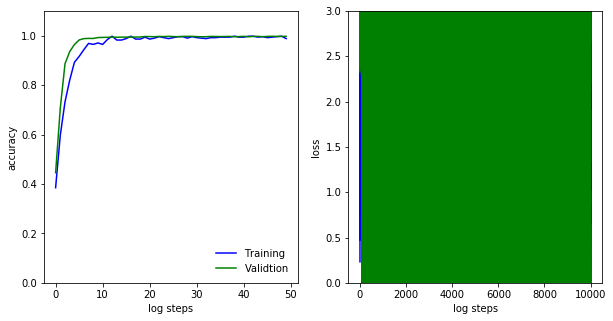

In [28]:
## loss and accuracy curves


plt.figure(figsize=(10, 5));
plt.subplot(1,2,1);
plt.plot(batch_acc_list,'-b',label='Training')
plt.plot(val_acc_list,'-g',label='Validtion')
plt.legend(loc='lower right', frameon=False)
plt.ylim(ymax = 1.1, ymin = 0.0)
plt.ylabel('accuracy')
plt.xlabel('log steps');

plt.subplot(1,2,2)
plt.plot(train_loss,'-b')
plt.plot(valid_loss,'-g')
plt.legend(loc='lower right', frameon=False)
plt.ylim(ymax = 3.0, ymin = 0.0)
plt.ylabel('loss')
plt.xlabel('log steps');

(0, 50)

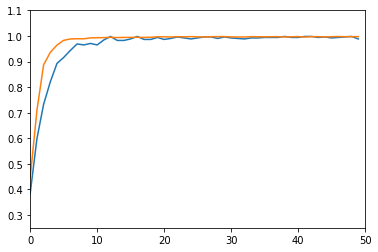

In [31]:
time_diff
plt.plot(batch_acc_list)
plt.plot(val_acc_list)
plt.ylim(.25,1.1)
plt.xlim(0,50)

# Step 3: Test a Model on New Images


Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find signnames.csv useful as it contains mappings from the class id (integer) to the actual sign name.


### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.


In [3]:
saver = tf.train.Saver()
saver.restore(sess=session, save_path='model_best_test')

ValueError: No variables to save

In [32]:
print_accuracy()

Accuracy on test set:  96.1%


### Predict the Sign Type for Each Image

In [64]:
def process_newimage_file(name):
    image = cv2.imread(name)
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image/255.-.5
    return image

def plot_newImage_3C(n_row,n_col,X):

    plt.figure(figsize = (8,6))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = i
        plt.imshow(X[ind_plot])
        plt.axis('off')
    plt.show()

In [44]:

from PIL import Image

img = Image.open('./test_signs/30_speedlimit.jpg')
new_width  = 32
new_height = 32
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save('./test_signs/30_speedlimit.png')

#newdata = [process_newimage_file("./test_signs/yield_new.png")]
f for f in listdir(directory) if f.endswith('.' + extension)


In [65]:
newdata = [process_newimage_file("./test_signs/"+name) for name in os.listdir("./test_signs/") if name.endswith('.'+'jpg')]
namenewdata = [name for name in os.listdir("./test_signs/")]
newdata = np.array(newdata ,dtype = np.float32)

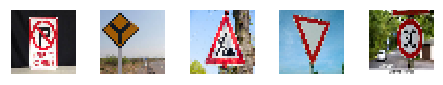

In [66]:
plot_newImage_3C(5,1,newdata+.5)

### Output Top 5 Softmax Probabilities for each Image found on the Web

In [73]:
#labels_pred = tf.nn.softmax(fc_layer3)
feed_dict_new = {features:newdata,
                            keep_prob: 1}
top5 = tf.nn.top_k(labels_pred, 5)

predictions = session.run(labels_pred,feed_dict = feed_dict_new)
top5_pred = session.run([labels_pred, top5], feed_dict=feed_dict_new)

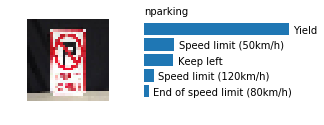

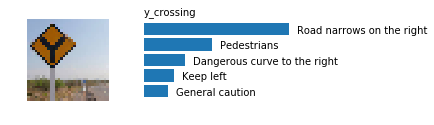

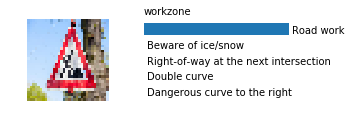

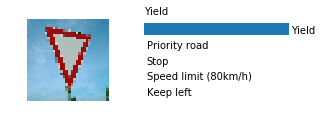

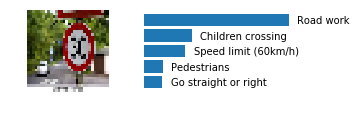

In [70]:
for i in range(5):
    plt.figure(figsize = (5,1.5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(newdata[i]+.5)
    plt.axis('off')
    plt.subplot(gs[1])
    plt.barh(6-np.arange(5),top5_pred[1][0][i], align='center')
    for i_label in range(5):
        plt.text(top5_pred[1][0][i][i_label]+.02,6-i_label-.25,
            data_pd['SignName'][top5_pred[1][1][i][i_label]])
    plt.axis('off');
    plt.text(0,6.95,namenewdata[i].split('.')[0]);
    plt.show();